**Exercise** Exploring linear regression

a) Make an artificial test case: write a function that receives an integer $n$ and

- Generates $n$ random values uniformly distributed in the interval $[0.0, 2.0]$
- Computes $y = 4 + 3x$
- Adds a Gaussian noise to $y$, of zero mean and unit standard deviation

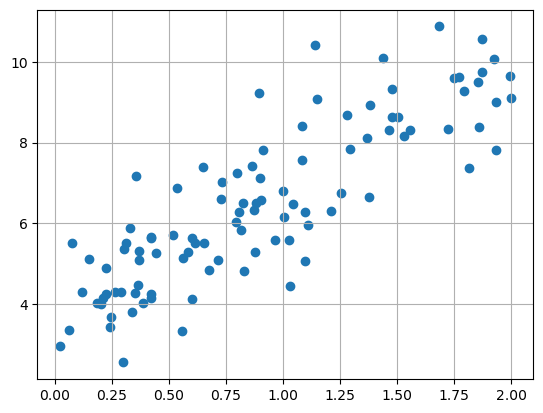

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 

def a(n):
    x = np.random.uniform(0, 2, [n,1])
    x.sort()
    y = [(4+3*x1) for x1 in x]
    erro = np.random.normal(0,1,[n,1])
    y_erro = y+erro  
    return([x,y_erro])

f = a(100)
  
plt.scatter(f[0], f[1])
plt.grid() 
plt.show()


b) Generate $n=10$ points and plot the points. Fit a linear regression model to this data. Record the fit parameters. Now repeat the procedure a total of $1000$ times and plot the histogram of the intercept and the coefficient.

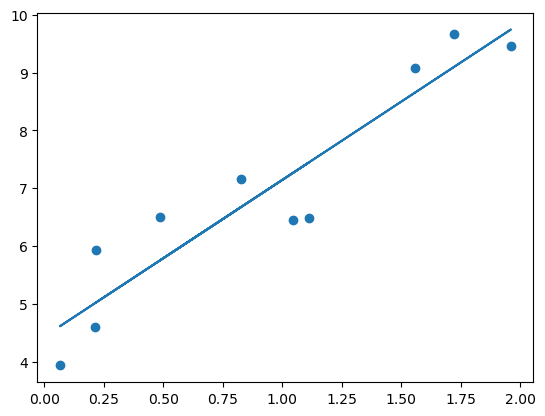

In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression

f1 = a(10)
model = LinearRegression().fit(f1[0], f1[1])

y_pred = model.predict(f1[0])



plt.scatter(f1[0], f1[1])
plt.plot(f1[0], y_pred)
plt.show()

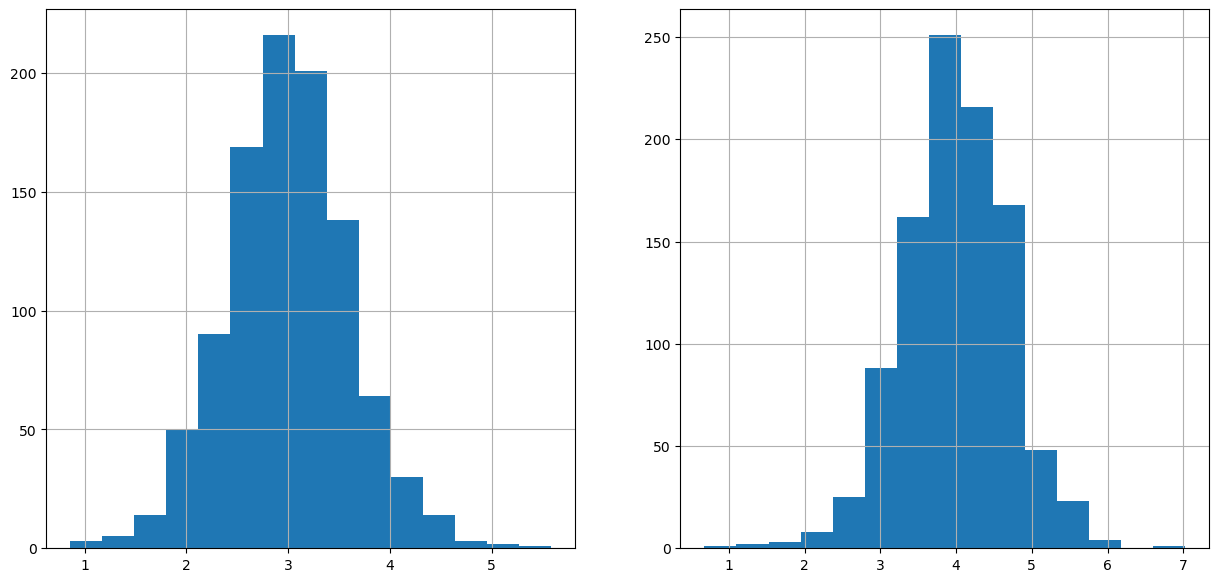

In [10]:
coef_a = []
coef_b = []
for i in range(1000):
  f2 = a(10)
  model = LinearRegression().fit(f2[0], f2[1])
  y_pred = model.predict(f2[0])
  coef_a.append(model.coef_[0][0])
  coef_b.append(model.intercept_[0])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(coef_a, bins = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(coef_b, bins = 15)
plt.grid()
plt.show()


In [5]:
coef_a

[array([3.75560087]),
 array([3.24613562]),
 array([4.17240137]),
 array([2.96087248]),
 array([3.03232475]),
 array([5.27169306]),
 array([2.757323]),
 array([2.52687831]),
 array([2.41821229]),
 array([2.70923367]),
 array([4.09715194]),
 array([2.82192758]),
 array([2.77379064]),
 array([2.89985007]),
 array([2.99467395]),
 array([4.46988343]),
 array([2.98422155]),
 array([2.13678514]),
 array([3.37867823]),
 array([3.58534551]),
 array([2.91206853]),
 array([2.44312165]),
 array([3.17162437]),
 array([3.31961365]),
 array([3.04693784]),
 array([4.08477991]),
 array([2.87718867]),
 array([3.06643518]),
 array([2.7803242]),
 array([2.90052888]),
 array([3.40801353]),
 array([3.3210675]),
 array([3.96060555]),
 array([1.96349088]),
 array([2.42534863]),
 array([2.4588689]),
 array([3.47616631]),
 array([2.71507715]),
 array([3.4214666]),
 array([2.36801389]),
 array([4.16943028]),
 array([2.74630905]),
 array([2.70664683]),
 array([2.96591042]),
 array([3.38359521]),
 array([2.483360

c) Repeat item (b) but for $n=1000$ points. What do you observe?

In [ ]:
coef_a = []
coef_b = []
for i in range(1000):
  f3 = a(1000)
  model = LinearRegression().fit(f3[0], f3[1])
  y_pred = model.predict(f3[0])
  coef_a.append(model.coef_[0])
  coef_b.append(model.intercept_)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(coef_a, bins = 10)
plt.grid()

plt.subplot(1,2,2)
plt.hist(coef_b, bins = 10)
plt.grid()
plt.show()

**Exercise** Exploring polynomial regression

a) Make an artificial test case: write a function that receives an integer $n$ and

- Generates $n$ random values uniformly distributed in the interval $[-3.0, 3.0]$
- Computes $y = 0.5 x^2 + x + 2$
- Adds a Gaussian noise to $y$, of zero mean and unit standard deviation

In [ ]:
def a(n):
    x = np.random.uniform(0, 2, n)
    x.sort()
    y = [(4+3*x1) for x1 in x]
    return([x,y])

b) Generate $n=10$ points and plot the points. Fit a linear regression model to this data. Record the fit parameters. Now repeat the procedure a total of $1000$ times and plot the histogram of the parameters.

c) Repeat item (b) but for $n=1000$ points. What do you observe?